In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

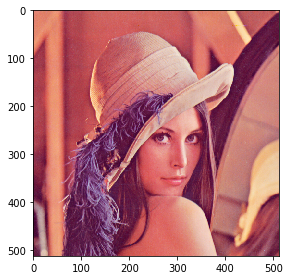

In [2]:
image = io.imread('Image_encoded_lena.tiff')
io.imshow(image)

In [3]:
rows, columns, dimensions = image.shape

In [4]:
# total_bits = rows*columns*dimensions
# one_channel_bits = rows*columns
# one_channel_bits, total_bits

In [5]:
# def from_bits(bits):
#     chars = []
#     for b in range(int(len(bits) / 8)):
#         byte = bits[b*8:(b+1)*8]
#         chars.append(chr(int(''.join([str(bit) for bit in byte]), 2)))
#     return ''.join(chars)

In [6]:
def from_bits(bits):
    chars = []
    for b in range(int(len(bits) / 8)):
        byte = bits[b*8:(b+1)*8]
        s = ''
        for i in byte:
            s += str(i)
        chars.append(int(s, 2))
    return chars

In [7]:
# message_len = 6640
channel = 0
# l_len = 32

In [8]:
len_decode = []# to get the length of the message

In [9]:
i = 0
j = 0
for k in range(511):
    bit = image[i, j, channel] & 1
    len_decode.append(bit)
    j += 1
    if j == columns:
        break

In [10]:
print(len_decode)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
for i in range(image.shape[0]):
    if(len_decode[i] == 1): #searching for first occuring one
        break
# to find the index to read for the length        
lim = 512 - (int((512 - i - 1)/8)+1) * 8 - 1

In [12]:
size = from_bits(len_decode[(lim):])
size

[50, 51, 55, 51, 48, 49, 54]

In [13]:
message_len = int(size)
message_len

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [ ]:
decode = []

In [ ]:
# i = 1
# j = 0
# channel = 0
# count = 0
# for k in range(message_len):
#     bit = image[i, j, channel] & 1
#     decode.append(bit)
#     j += 1
#     if j == columns:
#         j = 0
#         i += 1
#     if i == rows:
#         i = 0
#         channel += 1
#     if channel == 3:
#         break
#     count += 1

In [ ]:
decode = []
for ch in range(3):
    i = 1
    j = 0
    d = []
    for k in range(message_len):
        bit = image[i, j, ch] & 1
        d.append(bit)
        i += 1
        if i == columns:
            i = 0
            j += 1
        if j == rows:
            break
    decode.append(d)

In [ ]:
print(len(decode))

In [ ]:
print(decode)

In [ ]:
decoded_string = from_bits(decode)
decoded_string

In [ ]:
decoded_list = decoded_string.split(',')
print(decoded_list)

In [ ]:
len(decoded_list)

In [ ]:
r = 124
c = 152
ch = 4

In [ ]:
124*152*4

In [ ]:
new_img = np.zeros((r,c,ch))

In [ ]:
new_img = np.array(decoded_list).reshape((r,c,ch))           

In [ ]:
new_img